In [308]:
import networkx as nx
import pandas as pd
from pandas import DataFrame
import pandana, matplotlib.pyplot as plt
%matplotlib inline
from pandana.loaders import osm

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import xlsxwriter
import openpyxl
import osmnx as ox
ox.config(log_file=True, log_console=True, use_cache=True)
ox.__version__

'0.10'

# Alicante, Plaza de Los Luceros

In [309]:
point = (38.3459813, -0.49069405)
dist = 1500
networkType = 'walk'

#bbox = ox.bbox_from_point((38.3459813, -0.49069405), distance=dist)
north, south, east, west = ox.bbox_from_point(point, dist, project_utm=True)
north, south, east, west

(4248683.721726498, 4245683.721726498, 720787.582709981, 717787.582709981)

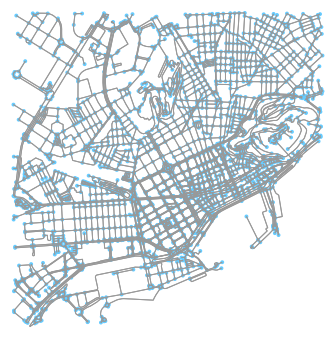

In [310]:
G = ox.graph_from_point(point, distance=dist, network_type=networkType)
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0, show=False, close=False)
fig, ax = ox.plot_graph(G, show=False, close=False) #We’ll just take advantage of the show and close parameters in OSMnx to prevent it from finishing the Matplotlib operation and instead returning the unclosed fix and ax objects.

## 1. Select networks & clean intersection

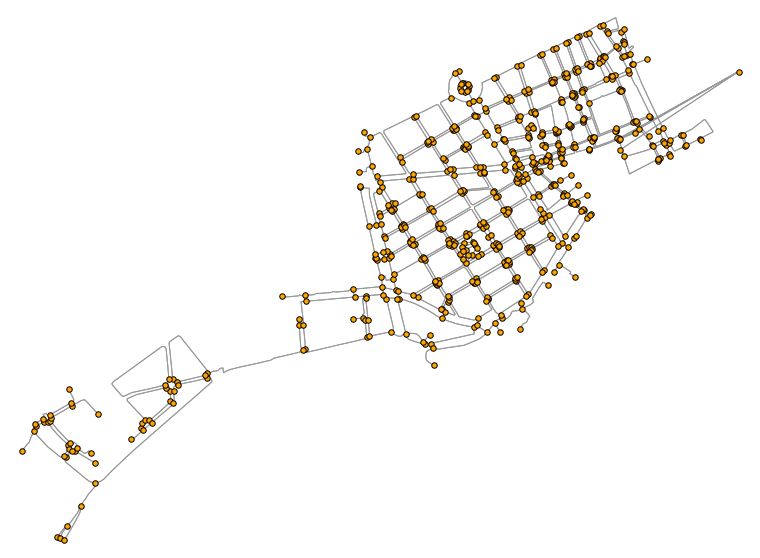

{'n': 614,
 'm': 1726,
 'k_avg': 5.62214983713355,
 'intersection_count': 544,
 'streets_per_node_avg': 2.820846905537459,
 'streets_per_node_counts': {0: 0, 1: 70, 2: 2, 3: 511, 4: 30, 5: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.11400651465798045,
  2: 0.003257328990228013,
  3: 0.8322475570032574,
  4: 0.048859934853420196,
  5: 0.0016286644951140066},
 'edge_length_total': 79007.77500000008,
 'edge_length_avg': 45.77507242178452,
 'street_length_total': 39520.852999999945,
 'street_length_avg': 45.7417280092592,
 'street_segments_count': 864,
 'node_density_km': 272.8888888888889,
 'intersection_density_km': 241.77777777777777,
 'edge_density_km': 35114.5666666667,
 'street_density_km': 17564.82355555553,
 'circuity_avg': 1.3834517847101925e-05,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [311]:
##### 1. Select infrastructure='way["highway"~"footway|birdleway|steps|corridor|path"]' to get a street network and plot it with all edge intersections
G = ox.graph_from_point(point, distance=dist, 
                        infrastructure='way["highway"~"footway|birdleway|steps|corridor|path"]')
G_proj_ifr = ox.project_graph(G)
fig, ax = ox.plot_graph(G_proj_ifr, fig_height=10, node_color='orange', node_size=30, node_zorder=2, node_edgecolor='k')

stats_basic = ox.stats.basic_stats(G_proj_ifr, area=dist*dist, clean_intersects=False, tolerance=15, circuity_dist='gc')
stats_basic

In [ ]:
G_proj_nodes = G_proj.nodes
writer = pd.ExcelWriter('D:/Thesis/1500m/nodes_G_proj.xlsx', engine='xlsxwriter')
df_G_proj_nodes= pd.DataFrame.from_dict(G_proj_nodes) 
df_G_proj_nodes.to_excel(writer, sheet_name='Sheet1')
writer.save()

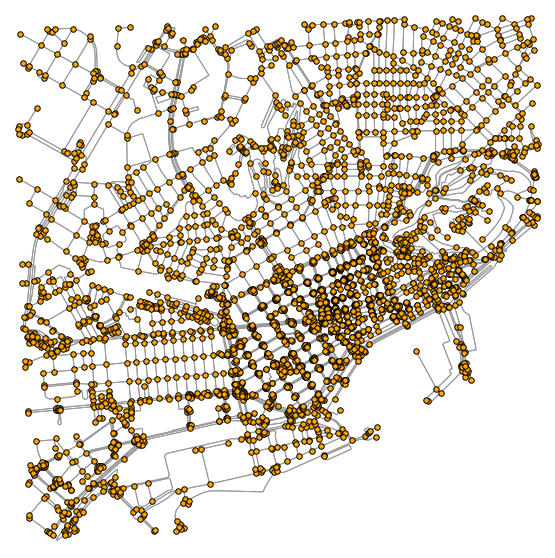

{'n': 3375,
 'm': 10676,
 'k_avg': 6.326518518518519,
 'intersection_count': 3170,
 'streets_per_node_avg': 3.204148148148148,
 'streets_per_node_counts': {0: 0,
  1: 205,
  2: 0,
  3: 2095,
  4: 1053,
  5: 20,
  6: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06074074074074074,
  2: 0.0,
  3: 0.6207407407407407,
  4: 0.312,
  5: 0.005925925925925926,
  6: 0.0005925925925925926},
 'edge_length_total': 504441.1239999982,
 'edge_length_avg': 47.25001161483685,
 'street_length_total': 253938.1259999998,
 'street_length_avg': 47.49170114082659,
 'street_segments_count': 5347,
 'node_density_km': 1500.0,
 'intersection_density_km': 1408.888888888889,
 'edge_density_km': 224196.05511111033,
 'street_density_km': 112861.38933333324,
 'circuity_avg': 1.2740330070004211e-05,
 'self_loop_proportion': 0.0016860247283626826,
 'clean_intersection_count': 1027,
 'clean_intersection_density_km': 456.44444444444446}

In [312]:
#2 Use network_type = "walk" to get a street network and plot it with all edge intersections
G = ox.graph_from_point(point, distance = dist, 
                        network_type = networkType)                         
G_proj = ox.project_graph(G)
fig, ax = ox.plot_graph(G_proj, fig_height=10, node_color='orange', node_size=30, 
                        node_zorder=2, node_edgecolor='k')

stats_basic = ox.stats.basic_stats(G_proj, area = dist * dist, 
                                   clean_intersects=True, #if clean_intersections = False, 不會計算intersection
                                   tolerance=15, circuity_dist='gc')
stats_basic
# G_proj

In [242]:
writer = pd.ExcelWriter('D:/Thesis/1500m/nodes_stats.xlsx', engine='xlsxwriter')
df_stats_basic = pd.DataFrame.from_dict(stats_basic) 
df_stats_basic.to_excel(writer, sheet_name='Sheet1')
writer.save()

## clean_intersection

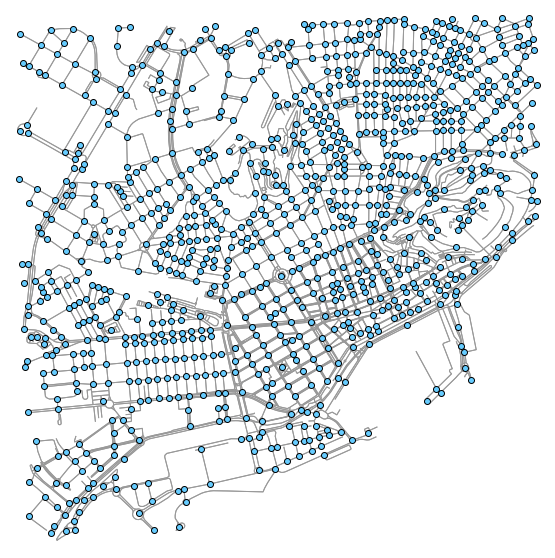

1027

In [317]:
# clean up the intersections and extract their xy coords
intersections = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False)
points = np.array([point.xy for point in intersections])
#clean_intersection_points = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False )
#clean_intersection_count = len(clean_intersection_points)

# plot the cleaned-up intersections (Adding a point to the plot () #https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html)
fig, ax = ox.plot_graph(G_proj, fig_height=10, show=False, close=False, node_alpha=0)
ax.scatter(x=points[:,0], y=points[:,1], zorder=2, color='#66ccff', edgecolors='k')
plt.show()

n = len(points)
m = len(list(G_proj.edges()))
n

In [304]:
writer = pd.ExcelWriter('D:/Thesis/1500m/intersections.xlsx', engine='xlsxwriter')
df_intersections = pd.DataFrame(points) 
df_intersections.to_excel(writer, sheet_name='Sheet1')
writer.save()

ValueError: Must pass 2-d input

## 2. Weighting / coloring edges by attributes

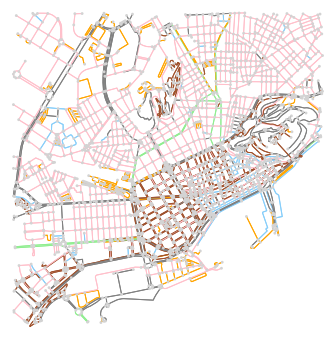

In [318]:
ec = [     'sienna'           if data['highway']=='footway'               
      else 'pink'             if data['highway']=='residential' 
      else 'orange'           if data['highway']=='service' 
      else 'lightgreen'       if data['highway']=='secondary'
      else 'lightskyblue'    if data['highway']=='pedestrian'
      else 'red'              if data['highway']=='cycleway' 
      else 'paleturquoise'    if data['highway']=='living street' 
      else 'grey'             for u, v, key, data in G.edges(keys=True, data=True)] #https://stackoverflow.com/questions/56234047/osmnx-plot-a-network-on-an-interactive-web-map-with-different-colours-per-infra

fig, ax = ox.plot_graph(G, 
                        node_color='lightgrey', 
                        #node_edgecolor='k', 
                        node_size=8, 
                        node_zorder=6, 
                        edge_color=ec, edge_linewidth=1)

# 3. Weighting nodes

# 3.1 Load network multigraph and node/edges

In [352]:
point = (38.3459813, -0.49069405)
dist = 1500
networkType = 'walk'

#####Get north, south, east, west 
bbox = ox.bbox_from_point(point, distance=dist)
north, south, east, west = bbox
north, south, east, west

#####Create network graph 1, "G", with osmnx
bbox = [north, south, east, west]
G1 = ox.graph_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3], network_type= networkType)

ox.graph_to_gdfs(G1, nodes=False).columns

Index(['u', 'v', 'key', 'osmid', 'highway', 'oneway', 'length', 'geometry',
       'lanes', 'maxspeed', 'name', 'service', 'access', 'tunnel', 'width',
       'ref', 'bridge', 'junction'],
      dtype='object')

In [336]:
##### Retrieve nodes and edges from graph and convert them into gdf
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G1)  #Alternatively, as stated in its documentation, you can use OSMnx to dump your nodes to a geopandas GeoDataFrame and work with it pandas-style:

#####retrieve the lat-long coordinates of a set of OSM node IDs in some graph : https://stackoverflow.com/questions/44839297/how-can-i-get-lon-lat-coordinates-from-node-idosmnx
gdf_nodes
# gdf_nodes.column
#gdf_nodes[['x', 'y']]

Index(['y', 'x', 'osmid', 'highway', 'geometry'], dtype='object')

In [265]:
writer = pd.ExcelWriter('D:/Thesis/1500m/nodes_coord.xlsx', engine='xlsxwriter')
gdf_nodes.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [321]:
##### bbox
north, south, east, west

#####Retrieve NODES using Pandana : lat_min(south = bbox[1]), lng_min (west = bbox[3]), lat_max (north = bbox[0]), lng_max (east = bbox[2])
G2 = osm.pdna_network_from_bbox(bbox[1], bbox[3], bbox[0], bbox[2])

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](38.33247573,-0.50784347,38.35948684,-0.47354495);>;);out;'}"
Downloaded 1,724.6KB from www.overpass-api.de in 2.15 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 2.22 seconds
Returning OSM data with 10,495 nodes and 2,693 ways...
Edge node pairs completed. Took 6.76 seconds
Returning processed graph with 4,014 nodes and 6,419 edges...
Completed OSM data download and Pandana node and edge table creation in 9.29 seconds


# 3.2 Load POIS using osm.node_query

In [322]:
tag_highway = ['bus_stop']
tag_amenity = ['bicycle_parking', 'motorcycle_parking', 'parking']
tags = tag_highway + tag_amenity
#print(tags)

tag_list = []
for i in range (0, len(tag_highway)):
    tag_list.append('"highway"="%s"'%tag_highway[i])
    for j in range (0, len(tag_amenity)):
        tag_list.append('"amenity"= "%s"'%tag_amenity[j])
#print(tag_list)

#Each tag 
pois2_lon = []
pois2_lat = []
for i in range (0,len(tag_list)):
    names = locals()
    names['pois2_{}'.format(tags[i])] = osm.node_query(bbox[1], bbox[3], bbox[0], bbox[2], tags='{}'.format(tag_list[i])) #each tag has own var name and data set
    names['pois2_{}_lon'.format(tags[i])] = list(names['pois2_{}'.format(tags[i])]['lon']) #each tag has own var name and lon list
    names['pois2_{}_lat'.format(tags[i])] = list(names['pois2_{}'.format(tags[i])]['lat']) #each tag has own var name and lat list
pois2_bus_stop

#Put all the lon & lat together
for i in range (0, len(tags)):
    pois2_lon += names['pois2_{}_lon'.format(tags[i])]  #all lon
    pois2_lat += names['pois2_{}_lat'.format(tags[i])]  #all lat
pois2_lon

[-0.4971138,
 -0.4976021,
 -0.5074371,
 -0.5039674,
 -0.504464,
 -0.5069068,
 -0.506822,
 -0.4967094,
 -0.498225,
 -0.4987904,
 -0.501196,
 -0.5012584,
 -0.4948927,
 -0.4894008,
 -0.4891433,
 -0.4937173,
 -0.4899516,
 -0.492747,
 -0.4898973,
 -0.4922111,
 -0.490161,
 -0.4905966,
 -0.4852785,
 -0.4869425,
 -0.4847821,
 -0.4853452,
 -0.4855208,
 -0.4866852,
 -0.4859485,
 -0.4849665,
 -0.4853625,
 -0.5006334,
 -0.4980729,
 -0.5022366,
 -0.4955266,
 -0.4842433,
 -0.4852132,
 -0.4765206,
 -0.4788985,
 -0.4766755,
 -0.4798542,
 -0.4834853,
 -0.4836064,
 -0.4758393,
 -0.4764069,
 -0.4746411,
 -0.4762928,
 -0.4746505,
 -0.4744297,
 -0.4749505,
 -0.4755477,
 -0.4770804,
 -0.4756771,
 -0.4759593,
 -0.4771625,
 -0.4899084,
 -0.4989542,
 -0.5031241,
 -0.4872058,
 -0.4962848,
 -0.4857024,
 -0.5067126,
 -0.4917124,
 -0.4847755,
 -0.50668,
 -0.4901128,
 -0.4933343,
 -0.48478,
 -0.4937832,
 -0.4854187,
 -0.5022103,
 -0.4963225,
 -0.4982353,
 -0.5058329,
 -0.5051254,
 -0.5075785,
 -0.5032071,
 -0.50358

In [323]:
#put all the pois2 data together
pois2 = names['pois2_{}'.format(tags[0])]

for i in range(0,len(tags)):
        if i > 0 :
               pois2 = pois2.append(names['pois2_{}'.format(tags[i])]) 
pois2['lon']
pois2

C:\Anaconda\envs\ox\lib\site-packages\pandas\core\frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


access addr:city addr:housenumber addr:postcode  \
id                                                                
662950782          NaN       NaN              NaN           NaN   
662950788          NaN       NaN              NaN           NaN   
1502714919         NaN       NaN              NaN           NaN   
1506250770         NaN       NaN              NaN           NaN   
1506250781         NaN       NaN              NaN           NaN   
...                ...       ...              ...           ...   
3415704759  designated       NaN              NaN           NaN   
4426732736         NaN       NaN              NaN           NaN   
6633334259         yes       NaN              NaN           NaN   
6755662812         yes   Alacant                6         03003   
6877656828         NaN       NaN              NaN           NaN   

                  addr:street  amenity bench bicycle_parking  bin  bus  ...  \
id                                                                      ...   
662950782                 NaN      NaN   yes             NaN  NaN  yes  ...   
662950788                 NaN      NaN    no             NaN  NaN  yes  ...   
1502714919                NaN      NaN   NaN             NaN  NaN  yes  ...   
1506250770                NaN      NaN   NaN             NaN  NaN  yes  ...   
1506250781                NaN      NaN   NaN             NaN  NaN  yes  ...   
...                       ...      ...   ...             ...  ...  ...  ...   
3415704759                NaN  parking   NaN             NaN  NaN  NaN  ...   
4426732736                NaN  parking   NaN             NaN  NaN  NaN  ...   
6633334259                NaN  parking   NaN             NaN  NaN  NaN  ...   
6755662812  avenida de Loring  parking   NaN             NaN  NaN  NaN  ...   
6877656828                NaN  parking   NaN             NaN  NaN  NaN  ...   

           payment:contactless payment:google_pay payment:mastercard  \
id                                                                     
662950782                  NaN                NaN                NaN   
662950788                  NaN                NaN                NaN   
1502714919                 NaN                NaN                NaN   
1506250770                 NaN                NaN                NaN   
1506250781                 NaN                NaN                NaN   
...                        ...                ...                ...   
3415704759                 NaN                NaN                NaN   
4426732736                 NaN                NaN                NaN   
6633334259                 NaN                NaN                NaN   
6755662812                 yes                yes                yes   
6877656828                 NaN                NaN                NaN   

           payment:visa public_transport   ref shelter  source:date  \
id                                                                    
662950782           NaN         platform  4320     yes          NaN   
662950788           NaN         platform  4326      no          NaN   
1502714919          NaN         platform  3961     NaN          NaN   
1506250770          NaN         platform  3911     NaN          NaN   
1506250781          NaN         platform  3944     NaN          NaN   
...                 ...              ...   ...     ...          ...   
3415704759          NaN              NaN   NaN     NaN          NaN   
4426732736          NaN              NaN   NaN     NaN          NaN   
6633334259          NaN              NaN   NaN     NaN          NaN   
6755662812          yes              NaN   NaN     NaN          NaN   
6877656828          NaN              NaN   NaN     NaN          NaN   

           tactile_paving wheelchair  
id                                    
662950782              no        NaN  
662950788              no        NaN  
1502714919            NaN        NaN  
1506250770            NaN        NaN  
1506250781           

In [271]:
writer = pd.ExcelWriter('D:/Thesis/1500m/pois2.xlsx', engine='xlsxwriter')
pois2.to_excel(writer, sheet_name='Sheet1')
writer.save()

# 3.3 Get INTERSECTION using OSMnx

In [324]:
##### 1. project the graph (G1) to meters to clean the intersections with a sensible tolerance parameter.
G_proj = ox.project_graph(G1)  

##### 2. Create a GeoDataFrame (list  POINT) called intersection
intersections = ox.clean_intersections(G_proj, tolerance=15, dead_ends=False)       
list(intersections)
dir(intersections)
len(intersections)
intersections # Return GeoDataFrame: POINT (719196.2439653946 4247140.633384085)

0        POINT (717957.5844034613 4245659.96915119)
1       POINT (717833.8439310142 4245761.304953192)
2       POINT (718088.7839697457 4245736.541793761)
3        POINT (718696.8106652739 4245700.88641574)
4        POINT (718551.9080633671 4245679.33126297)
                           ...                     
1022    POINT (720119.0454380064 4247149.482927805)
1023    POINT (717960.4850530026 4247154.295933075)
1024    POINT (719741.6990114561 4247154.426122268)
1025     POINT (720325.783942463 4247180.686031214)
1026    POINT (719285.3874947219 4247182.905183224)
Length: 1027, dtype: object

In [373]:
##### 4.2 plot the cleaned-up intersections with (lat, lon) = spherical lat-long geometries
#project the GeoDataframe of (cleaned intersection) centroids back to lat-long : https://stackoverflow.com/questions/50913798/osmnx-get-lat-lon-coordinates-of-clean-intersection-nodes
gdf_intersections2 = gpd.GeoDataFrame(geometry = intersections)
gdf_intersections2.crs = G_proj.graph['crs']
test = ox.project_gdf(gdf_intersections2, to_latlong=True)

#"geometry"--> POINT --> (lat, lon): Get Lat Lon Coordinates of Clean Intersection Nodes
gdf_intersections2 = gpd.GeoDataFrame(test, columns=['geometry'], crs=G1.graph['crs'])  ####Firstly, convert PROJECT into GeoDataFrame 
intersection_lon = gdf_intersections2['geometry'].map(lambda pt: pt.coords[0][0])
intersection_lat = gdf_intersections2['geometry'].map(lambda pt: pt.coords[0][1])
intersection_lon_list = list(intersection_lon)
intersection_lat_list = list(intersection_lat)
interesection_coord = (intersection_lat, intersection_lon)   #Return: values
print(interesection_coord)

(0       38.332586
1       38.333529
2       38.333244
3       38.332775
4       38.332616
          ...    
1022    38.345469
1023    38.346040
1024    38.345606
1025    38.345699
1026    38.345974
Name: geometry, Length: 1027, dtype: float64, 0      -0.506370
1      -0.507754
2      -0.504847
3      -0.497908
4      -0.499571
          ...   
1022   -0.481199
1023   -0.505876
1024   -0.485511
1025   -0.478825
1026   -0.490719
Name: geometry, Length: 1027, dtype: float64)


geometry
0     POINT (-0.5063704583081033 38.33258630342446)
1     POINT (-0.5077536499945658 38.33352880000037)
2      POINT (-0.5048470771209864 38.3332438325975)
3     POINT (-0.4979078183016116 38.33277462976166)
4     POINT (-0.4995708500118914 38.33261590000536)
...                                             ...
1022  POINT (-0.4811988000000005 38.34546909999998)
1023  POINT (-0.5058757598777504 38.34604024780509)
1024  POINT (-0.4855113499964324 38.34560625000044)
1025  POINT (-0.4788254834496756 38.34569921694298)
1026  POINT (-0.4907194013623538 38.34597448547014)

[1027 rows x 1 columns]

In [278]:
writer = pd.ExcelWriter('D:/Thesis/1500m/interesection_coord.xlsx', engine='xlsxwriter')
gdf_intersections2.to_excel(writer, sheet_name='Sheet1')
writer.save()

# 3.4 Get NODE id near POIs 

In [326]:
#####Retrieve node id in G2 near intersection 
node_near_pois2 = G2.get_node_ids(pois2_lon, pois2_lat, mapping_distance=1) 
node_near_pois2[0]
node_near_pois2
#dw: AttributeError: 'MultiDiGraph' object has no attribute 'get_node_ids'

0       253770798
1      1227826603
2      6632180249
3       253094683
4       234758921
          ...    
288     241784512
289    3740394382
290    6633334259
291    4529345973
292    4550005828
Name: node_id, Length: 293, dtype: int64

# 3.5 Get NODE id near intersection using pandana

In [327]:
####1. Get node_id near to POIs using (x, y) of pois in G1  -------->Doesnt'work
node_near_intersections = G2.get_node_ids(intersection_lon_list, intersection_lat_list, mapping_distance=1) 
node_near_intersections

0       6874458730
1       2545497376
2       6874459100
3       2299335995
4        376369182
           ...    
1022     376341616
1023     253137815
1024     241862393
1025    4529333002
1026     940123713
Name: node_id, Length: 1027, dtype: int64

# 3.6  Add new column/attribute ("near_ids_list2" =node id near pois) to data frame pois1 and pois2 using  pandana

In [354]:
#####1.要轉換成list type才能把data 放到new column : https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
node_near_ids_list2 = list(node_near_pois2) 
node_near_ids_list2

##### 2. Add new column / attribute(?) to the data frame using pandana

pois2['node_near_pois_list2'] = node_near_ids_list2 ###可以加到pois2 (pois using pandana)
pois2

#####ValueError: Length of values does not match length of index
#pois1['nearest_pois_list2'] = node_near_ids_list2
#list(pois1)                          ##Access the index ofthe dataframe
#pois1

access addr:city addr:housenumber addr:postcode  \
id                                                                
662950782          NaN       NaN              NaN           NaN   
662950788          NaN       NaN              NaN           NaN   
1502714919         NaN       NaN              NaN           NaN   
1506250770         NaN       NaN              NaN           NaN   
1506250781         NaN       NaN              NaN           NaN   
...                ...       ...              ...           ...   
3415704759  designated       NaN              NaN           NaN   
4426732736         NaN       NaN              NaN           NaN   
6633334259         yes       NaN              NaN           NaN   
6755662812         yes   Alacant                6         03003   
6877656828         NaN       NaN              NaN           NaN   

                  addr:street  amenity bench bicycle_parking  bin  bus  ...  \
id                                                                      ...   
662950782                 NaN      NaN   yes             NaN  NaN  yes  ...   
662950788                 NaN      NaN    no             NaN  NaN  yes  ...   
1502714919                NaN      NaN   NaN             NaN  NaN  yes  ...   
1506250770                NaN      NaN   NaN             NaN  NaN  yes  ...   
1506250781                NaN      NaN   NaN             NaN  NaN  yes  ...   
...                       ...      ...   ...             ...  ...  ...  ...   
3415704759                NaN  parking   NaN             NaN  NaN  NaN  ...   
4426732736                NaN  parking   NaN             NaN  NaN  NaN  ...   
6633334259                NaN  parking   NaN             NaN  NaN  NaN  ...   
6755662812  avenida de Loring  parking   NaN             NaN  NaN  NaN  ...   
6877656828                NaN  parking   NaN             NaN  NaN  NaN  ...   

           payment:google_pay payment:mastercard payment:visa  \
id                                                              
662950782                 NaN                NaN          NaN   
662950788                 NaN                NaN          NaN   
1502714919                NaN                NaN          NaN   
1506250770                NaN                NaN          NaN   
1506250781                NaN                NaN          NaN   
...                       ...                ...          ...   
3415704759                NaN                NaN          NaN   
4426732736                NaN                NaN          NaN   
6633334259                NaN                NaN          NaN   
6755662812                yes                yes          yes   
6877656828                NaN                NaN          NaN   

           public_transport   ref shelter source:date  tactile_paving  \
id                                                                      
662950782          platform  4320     yes         NaN              no   
662950788          platform  4326      no         NaN              no   
1502714919         platform  3961     NaN         NaN             NaN   
1506250770         platform  3911     NaN         NaN             NaN   
1506250781         platform  3944     NaN         NaN             NaN   
...                     ...   ...     ...         ...             ...   
3415704759              NaN   NaN     NaN         NaN             NaN   
4426732736              NaN   NaN     NaN         NaN             NaN   
6633334259              NaN   NaN     NaN         NaN             NaN   
6755662812              NaN   NaN     NaN         NaN             NaN   
6877656828              NaN   NaN     NaN         NaN             NaN   

           wheelchair node_near_pois_list2  
id                                          
662950782         NaN            253770798  
662950788         NaN           1227826603  
1502714919        NaN           6632180249  
1506250770        NaN            253094683  
1506250781        NaN            234758921  
...  

# 3.7 Add new column / attribute ("node_near_intersections") to the data of "gdf_intersection2" using OSMnx

In [448]:
node_near_intersections_list = list(node_near_intersections) 
node_near_intersections_list
gdf_intersections2['node_near_intersections'] = node_near_intersections
gdf_intersections2 #This is a Geodataframe

geometry  node_near_intersections
0      POINT (717957.5844034613 4245659.96915119)               6874458730
1     POINT (717833.8439310142 4245761.304953192)               2545497376
2     POINT (718088.7839697457 4245736.541793761)               6874459100
3      POINT (718696.8106652739 4245700.88641574)               2299335995
4      POINT (718551.9080633671 4245679.33126297)                376369182
...                                           ...                      ...
1022  POINT (720119.0454380064 4247149.482927805)                376341616
1023  POINT (717960.4850530026 4247154.295933075)                253137815
1024  POINT (719741.6990114561 4247154.426122268)                241862393
1025   POINT (720325.783942463 4247180.686031214)               4529333002
1026  POINT (719285.3874947219 4247182.905183224)                940123713

[1027 rows x 2 columns]

# 3.9 Data 4 : merge datas,  pois and node, and create a new data frame

In [471]:
#####無法用OSMnx 去add a new column 所以只能用merge data
G1_n_pois2  = pd.merge(pois2,                  #data frame 1
               gdf_nodes,                   #data frame 2
               left_on='node_near_pois_list2', #column in data frame 1
               right_on='osmid',         #column in data frame 2
               how='right',              #以右邊為主
               sort=False,
               suffixes=['_from', '_to'])
G1_n_pois2 
#G1_n_pois2 ['x']

G1_n_pois2_n_intersection = pd.merge(gdf_intersections2,                  #data frame 1
               G1_n_pois2,                   #data frame 2
               left_on='node_near_intersections', #column in data frame 1
               right_on='osmid',         #column in data frame 2
               how='right',              #以右邊為主
               sort=False,
               suffixes=['_from', '_to'])
G1_n_pois2_n_intersection
# len(G1_n_pois2_n_intersection)

geometry_from  node_near_intersections  \
0      POINT (717957.5844034613 4245659.96915119)             6.874459e+09   
1     POINT (717833.8439310142 4245761.304953192)             2.545497e+09   
2     POINT (718088.7839697457 4245736.541793761)             6.874459e+09   
3      POINT (718696.8106652739 4245700.88641574)             2.299336e+09   
4      POINT (718551.9080633671 4245679.33126297)             3.763692e+08   
...                                           ...                      ...   
3392                                          NaN                      NaN   
3393                                          NaN                      NaN   
3394                                          NaN                      NaN   
3395                                          NaN                      NaN   
3396                                          NaN                      NaN   

     access addr:city addr:housenumber addr:postcode addr:street amenity  \
0       NaN       NaN              NaN           NaN         NaN     NaN   
1       NaN       NaN              NaN           NaN         NaN     NaN   
2       NaN       NaN              NaN           NaN         NaN     NaN   
3       NaN       NaN              NaN           NaN         NaN     NaN   
4       NaN       NaN              NaN           NaN         NaN     NaN   
...     ...       ...              ...           ...         ...     ...   
3392    NaN       NaN              NaN           NaN         NaN     NaN   
3393    NaN       NaN              NaN           NaN         NaN     NaN   
3394    NaN       NaN              NaN           NaN         NaN     NaN   
3395    NaN       NaN              NaN           NaN         NaN     NaN   
3396    NaN       NaN              NaN           NaN         NaN     NaN   

     bench bicycle_parking  ... shelter source:date tactile_paving wheelchair  \
0      NaN             NaN  ...     NaN         NaN            NaN        NaN   
1      NaN             NaN  ...     NaN         NaN            NaN        NaN   
2      NaN             NaN  ...     NaN         NaN            NaN        NaN   
3      NaN             NaN  ...     NaN         NaN            NaN        NaN   
4      NaN             NaN  ...     NaN         NaN            NaN        NaN   
...    ...             ...  ...     ...         ...            ...        ...   
3392   NaN             NaN  ...     NaN         NaN            NaN        NaN   
3393   NaN             NaN  ...     NaN         NaN            NaN        NaN   
3394   NaN             NaN  ...     NaN         NaN            NaN        NaN   
3395   NaN             NaN  ...     NaN         NaN            NaN        NaN   
3396   NaN             NaN  ...     NaN         NaN            NaN        NaN   

     node_near_pois_list2          y         x       osmid highway_to  \
0                     NaN  38.332606 -0.506414  6874458730        NaN   
1                     NaN  38.333459 -0.507746  2545497376        NaN   
2                     NaN  38.333282 -0.504890  6874459100        NaN   
3                     NaN  38.332765 -0.497914  2299335995        NaN   
4                     NaN  38.332590 -0.499605   376369182        NaN   
...                   ...        ...       ...         ...        ...   
3392                  NaN  38.341535 -0.493880  4524113914        NaN   
3393                  NaN  38.341915 -0.493987  4524113915        NaN   
3394                  NaN  38.342142 -0.494014  4524113917        NaN   
3395                  NaN  38.342320 -0.493590  4524113918        NaN   
3396                  NaN  38.342301 -0.493549  4524113919        NaN   

                        geometry_to  
0      POINT (-0.5064138 38.332606)  
1     POINT (-0.5077461 38.3334589)  
2     POINT (-0.5048903 38.3332819)  
3     POINT (-0.4979145 38.3327654)  
4     POINT (-0.4996048 38.3325904)  
...                             ...  
3392  POINT (-0.4938804 38.3415347)  
3393  POINT (-0.4939866 38.34191

In [487]:
pois2_n_interestions  = pd.merge(pois2,                  #data frame 1
               gdf_intersections2,                   #data frame 2
               left_on='node_near_pois_list2', #column in data frame 1
               right_on='node_near_intersections',         #column in data frame 2
               how='right',              #以右邊為主
               sort=False,
               suffixes=['_from', '_to'])
pois2_n_interestions  

access addr:city addr:housenumber addr:postcode addr:street amenity  \
0       NaN       NaN              NaN           NaN         NaN     NaN   
1       NaN       NaN              NaN           NaN         NaN     NaN   
2       NaN       NaN              NaN           NaN         NaN     NaN   
3       NaN       NaN              NaN           NaN         NaN     NaN   
4       NaN       NaN              NaN           NaN         NaN     NaN   
...     ...       ...              ...           ...         ...     ...   
1032    NaN       NaN              NaN           NaN         NaN     NaN   
1033    NaN       NaN              NaN           NaN         NaN     NaN   
1034    NaN       NaN              NaN           NaN         NaN     NaN   
1035    NaN       NaN              NaN           NaN         NaN     NaN   
1036    NaN       NaN              NaN           NaN         NaN     NaN   

     bench bicycle_parking  bin  bus  ... payment:visa public_transport   ref  \
0      yes             NaN  NaN  yes  ...          NaN         platform  4320   
1      NaN             NaN  NaN  yes  ...          NaN         platform  4304   
2      NaN             NaN  NaN  yes  ...          NaN         platform  3961   
3      NaN             NaN  NaN  yes  ...          NaN         platform  3912   
4      NaN             NaN  NaN  yes  ...          NaN         platform  3943   
...    ...             ...  ...  ...  ...          ...              ...   ...   
1032   NaN             NaN  NaN  NaN  ...          NaN              NaN   NaN   
1033   NaN             NaN  NaN  NaN  ...          NaN              NaN   NaN   
1034   NaN             NaN  NaN  NaN  ...          NaN              NaN   NaN   
1035   NaN             NaN  NaN  NaN  ...          NaN              NaN   NaN   
1036   NaN             NaN  NaN  NaN  ...          NaN              NaN   NaN   

     shelter source:date tactile_paving wheelchair  node_near_pois_list2  \
0        yes         NaN             no        NaN          2.537708e+08   
1        NaN         NaN            NaN        NaN          2.537708e+08   
2        NaN         NaN            NaN        NaN          6.632180e+09   
3        NaN         NaN            NaN        NaN          2.567888e+09   
4        NaN         NaN            NaN        NaN          2.485471e+08   
...      ...         ...            ...        ...                   ...   
1032     NaN         NaN            NaN        NaN                   NaN   
1033     NaN         NaN            NaN        NaN                   NaN   
1034     NaN         NaN            NaN        NaN                   NaN   
1035     NaN         NaN            NaN        NaN                   NaN   
1036     NaN         NaN            NaN        NaN                   NaN   

                                         geometry node_near_intersections  
0     POINT (718699.3903619813 4247649.083966722)               253770798  
1     POINT (718699.3903619813 4247649.083966722)               253770798  
2     POINT (717834.2675568679 4245962.230691374)              6632180249  
3      POINT (718635.818576415 4246459.539360927)              2567888477  
4      POINT (718578.7745159983 4246458.32121585)               248547143  
...                                           ...                     ...  
1032  POINT (720119.0454380064 4247149.482927805)               376341616  
1033  POINT (717960.4850530026 4247154.295933075)               253137815  
1034  POINT (719741.6990114561 4247154.426122268)               241862393  
1035   POINT (720325.783942463 4247180.686031214)              4529333002  
1036  POINT (719285.3874947219 4247182.905183224)               940123713  

[1037 rows x 42 columns]

In [500]:
##### 4.2 plot the cleaned-up intersections with (lat, lon) = spherical lat-long geometries
#project the GeoDataframe of (cleaned intersection) centroids back to lat-long : https://stackoverflow.com/questions/50913798/osmnx-get-lat-lon-coordinates-of-clean-intersection-nodes
gdf_intersections3 = gpd.GeoDataFrame(geometry = pois2_n_interestions['geometry'])
gdf_intersections3.crs = G_proj.graph['crs']
gdf_interesection4 = ox.project_gdf(gdf_intersections3, to_latlong=True)

#"geometry"--> POINT --> (lat, lon): Get Lat Lon Coordinates of Clean Intersection Nodes
gdf_intersections5 = gpd.GeoDataFrame(gdf_interesection4, columns=['geometry'], crs=G1.graph['crs'])  ####Firstly, convert PROJECT into GeoDataFrame 
intersection_lon2 = gdf_intersections5['geometry'].map(lambda pt: pt.coords[0][0])
intersection_lat2 = gdf_intersections5['geometry'].map(lambda pt: pt.coords[0][1])
intersection_lon_list2 = list(intersection_lon2)
intersection_lat_list2 = list(intersection_lat2)
interesection_coord2 = (intersection_lat2, intersection_lon2)   #Return: values
print(interesection_coord2)

(0       38.350315
1       38.350315
2       38.335338
3       38.339620
4       38.339623
          ...    
1032    38.345469
1033    38.346040
1034    38.345606
1035    38.345699
1036    38.345974
Name: geometry, Length: 1037, dtype: float64, 0      -0.497275
1      -0.497275
2      -0.507687
3      -0.498370
4      -0.499023
          ...   
1032   -0.481199
1033   -0.505876
1034   -0.485511
1035   -0.478825
1036   -0.490719
Name: geometry, Length: 1037, dtype: float64)


In [306]:
writer = pd.ExcelWriter('D:/Thesis/1500m/combined.xlsx', engine='xlsxwriter')
# df_intersections = pd.DataFrame(points) 
G1_n_pois2_n_intersection.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [492]:
select_nodes17 = ['r' if node in node_near_ids_list2 else 'pink' for node in G1.nodes()]   
select_intersections = ['b' if node in node_near_intersections else 'grey' for node in G1.nodes()]

select_intersections2 = [ 'b' if item in pois2_n_interestions['ref'] == 4320 else 'r'  for item in pois2_n_interestions['ref']]
select_intersections2

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r'

In [54]:
ec = [     'skyblue'       if data['highway']=='footway'               
      else 'skyblue'       if data['highway']=='residential' 
      #else 'lightgreen'   if data['highway']=='cycleway' 
      #else 'sienna'        if data['highway']=='service' 
      #else 'paleturquoise'    if data['highway']=='living street' 
      else 'grey'          if data['highway']=='secondary'
      #else 'lightskyblue'  if data['highway']=='pedestrian'
      else 'black'         for u, v, key, data in G.edges(keys=True, data=True)] #https://stackoverflow.com/questions/56234047/osmnx-plot-a-network-on-an-interactive-web-map-with-different-colours-per-infra

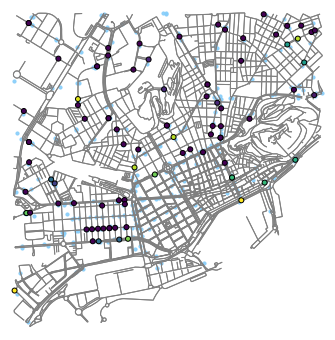

In [506]:
#####Layer 1: Plot network = G1 
fig, ax = ox.plot_graph(G1, fig_height=6, 
#fig, ax = ox.plot_graph(G1, fig_height=10, 
                        node_color=select_intersections, node_size=20, node_zorder=2,  
                         node_alpha=0,                    ####會使node隱形
                        show=False, close=False,   #####prevent Matplotlib
                        edge_color = 'grey')
                        #edge_color='#777777')
                        #edge_color='#dddddd')

#####Layer 2: Plot POIs : Retrieve the list of lon and lat from dataframe "pois2"
x_pois = list(pois2['lon'])
y_pois = list(pois2['lat'])
ax.scatter(x_pois, y_pois, c = 'lightskyblue', s = 10, alpha=0.9)

#####Layer 3 : Plot INTERSECTIONS 
#####https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category
ax.scatter(x = intersection_lon_list2, y = intersection_lat_list2, zorder=2, 
               c= pois2_n_interestions['node_near_pois_list2'],
               #color=gdf_intersections2['node_near_intersections'], #ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs. For a sequence of values to be color-mapped, use the 'c' argument instead.
               edgecolors='k', s = 25)


#####Layer 4: Plot nodes near POIs: Retrieve the list of lon and lat from "nearest_to_pois", the x and y of node nearest to pois
x_node_near_pois = list(G1_n_pois2['x']) 
y_node_near_pois = list(G1_n_pois2['y'])
#ax.scatter(x_node_near_pois[0:20], y_node_near_pois[0:20], c='green', zorder = 1, s = 180, alpha=0.3)

plt.show()

# 4. Bearing

## 4.1 Calculate bearing without defining isochrone

In [108]:
G = ox.add_edge_bearings(G)

#####2.1 Create a "Series" with column name: https://stackoverflow.com/questions/23365466/pandas-series-to-excel
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)],name='Alicante, Plaza de Los Luceros')
bearings

#####2.2 Create a Pandas dataframe from some data: https://xlsxwriter.readthedocs.io/example_pandas_simple.html
#df = pd.DataFrame({'Data': [10, 20, 30, 20, 15, 30, 45]})
#df = DataFrame(beariings, columns= ['Brand', 'Price'])

#####3. Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('E:/Walkability around bus stops/bearing/bearing.xlsx', engine='xlsxwriter')

#####4. Convert the dataframe to an XlsxWriter Excel object. (https://xlsxwriter.readthedocs.io/example_pandas_positioning.html)
bearings.to_excel(writer, sheet_name='Sheet1')

#####%. Close the Pandas Excel writer and output the Excel file.
writer.save()

Text(0.5, 1.0, 'bearning')

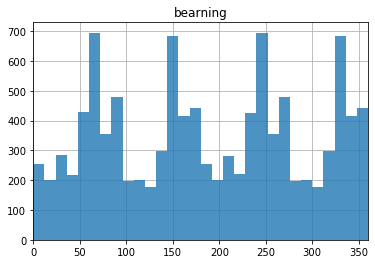

In [109]:
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

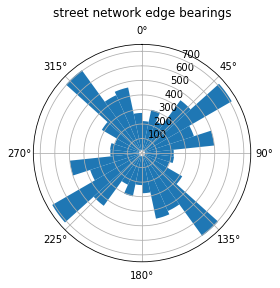

In [110]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]

count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))

division = division[0:-1]
width =  2 * np.pi/n

ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

## 4.2.1 Select isochrone and color all travel times

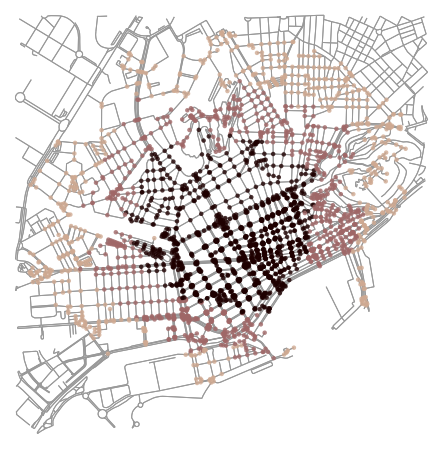

In [121]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

#############define 等時圈

center_node = ox.get_nearest_node(G, (38.3459813, -0.49069405))

meters_per_minute = 5 * 1000 / 60 # 每小時10公里
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] #分鐘

iso_colors = ox.get_colors(n=len(trip_times), cmap='pink_r', start=0.5, return_hex=True)
node_colors = {}
####Possible values for cmap =Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r,
#Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu,
#PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn,
#RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, 
#YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, 
#cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, 
#gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, 
#gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral,
#nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, 
#summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, 
#twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

#####color all three travel times : radius value = trip_time
radius_value = trip_times

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')      ###改變radius的value: trip_time, 10, 15, 20
    for node in subgraph.nodes():
        node_colors[node] = color # 抵達的node給顏色
        
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

## 4.2.2 Select isochrone and color travel times = ? min

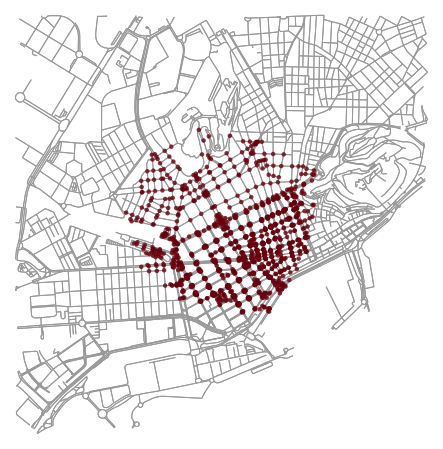

In [71]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

#############define 等時圈

center_node = ox.get_nearest_node(G, (38.3459813, -0.49069405))

meters_per_minute = 5 * 1000 / 60 # 每小時10公里
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] #分鐘

iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.3, return_hex=True)
node_colors = {}

#####color only 10min trip  : radius value = 10
radius_value = 10

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20
    for node in subgraph.nodes():
        node_colors[node] = color # 抵達的node給顏色
        
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(G, fig_height=8, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)

## 4.2.3.1 Calculate bearing of defined isochrone

In [163]:
subgraph = nx.ego_graph(G, center_node, radius=radius_value, distance='time')
G = ox.add_edge_bearings(subgraph)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)],name='Alicante, Plaza de Los Luceros')
bearings
writer = pd.ExcelWriter('E:/Walkability around bus stops/bearing/bearing.xlsx', engine='xlsxwriter')
bearings.to_excel(writer, sheet_name='Sheet1')
writer.save()

FileCreateError: [Errno 2] No such file or directory: 'E:/Walkability around bus stops/bearing/bearing.xlsx'

Text(0.5, 1.0, 'bearning')

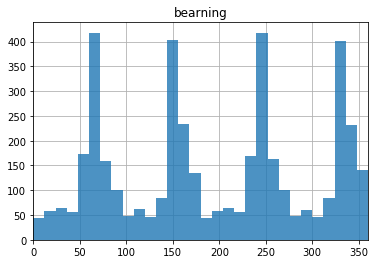

In [164]:
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

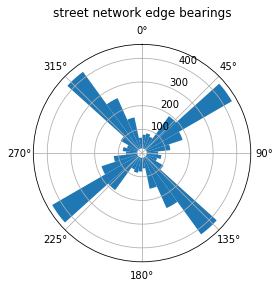

In [165]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]

count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))

division = division[0:-1]
width =  2 * np.pi/n

ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# 5. Centrality

## 5.1  Degree centrality

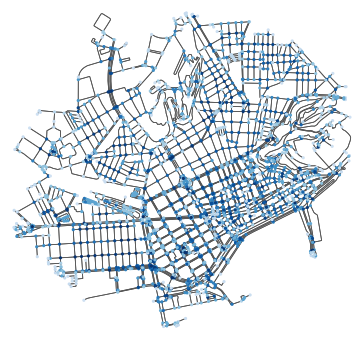

In [125]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')

#############define 等時圈

center_node = ox.get_nearest_node(G, (38.3459813, -0.49069405))

meters_per_minute = 5 * 1000 / 60 # 每小時10公里
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] #分鐘

iso_colors = ox.get_colors(n=len(trip_times), cmap='Blues', start=0.3, return_hex=True)
node_colors = {}

#####color only 10min trip  : radius value = 10
radius_value = 20

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20

# node closeness centrality
node_degree_centrality = nx.degree_centrality(subgraph)

# plot it
df = pd.DataFrame(data=pd.Series(node_degree_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='Blues', start=0.2) #cmap='inferno', start=0.2)
df = df.reindex(subgraph.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(subgraph, node_size=10, node_color=nc, node_edgecolor='none', node_zorder=2, #bgcolor='#e0e0e0',
                        edge_color='#555555', edge_linewidth=0.8, edge_alpha=1)

## 5.1 Closeness centrality

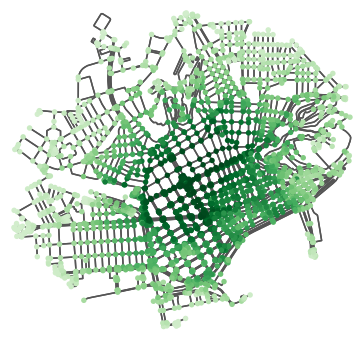

In [130]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')

#############define 等時圈

center_node = ox.get_nearest_node(G, (38.3459813, -0.49069405))

meters_per_minute = 5 * 1000 / 60 # 每小時10公里
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] #分鐘

iso_colors = ox.get_colors(n=len(trip_times), cmap='pink', start=0.3, return_hex=True)
node_colors = {}

#####color only 10min trip  : radius value = 10
radius_value = 20

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20

# node closeness centrality
node_closeness_centrality = nx.closeness_centrality(subgraph)

# plot it
df = pd.DataFrame(data=pd.Series(node_closeness_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='Greens', start=0.2)
df = df.reindex(subgraph.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(subgraph, node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

## 5.2 Betweenness centrality

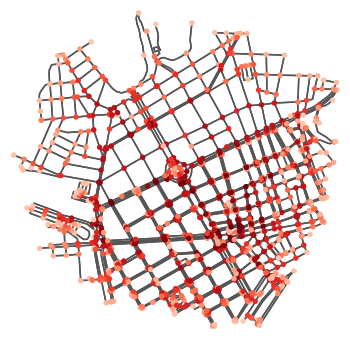

In [129]:
G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')

#############define 等時圈

center_node = ox.get_nearest_node(G, (38.3459813, -0.49069405))

meters_per_minute = 5 * 1000 / 60 # 每小時10公里
for u, v, k, data in G.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute
    
trip_times = [10, 15, 20] #分鐘

iso_colors = ox.get_colors(n=len(trip_times), cmap='Reds', start=0.5, return_hex=True)
node_colors = {}

#####color only 10min trip  : radius value = 10
radius_value = 10

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20
    
# node betweenness centrality
G2 = nx.DiGraph(subgraph)

node_betweenness_centrality = nx.betweenness_centrality(G2, weight='length',normalized=True)

# plot it
df = pd.DataFrame(data=pd.Series(node_betweenness_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='Reds', start=0.2)
df = df.reindex(G2.nodes())
nc = df['colors'].tolist()
#####!!!!!!use "subgraph" and NOT "subgraph_DiGraph"
fig, ax = ox.plot_graph(subgraph, node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

# 6. Stat 
https://notebooks.azure.com/bradcavanagh/projects/osmnx-examples/html/notebooks/06-example-osmnx-networkx.ipynb

In [128]:
#####To calculate density-based metrics, you must also pass the network's bounding area in square meters (otherwise basic_stats() will just skip them in the calculation):
##### get the street network for a place, and its area in square meters

G = ox.graph_from_point((38.3459813, -0.49069405), distance=1500, network_type='walk')

stats_basic = ox.stats.basic_stats(G, area=2250000, clean_intersects=False, tolerance=15, circuity_dist='gc')
df_stats_basic = pd.DataFrame.from_dict(stats_basic) 
stats_extended = ox.extended_stats(G, connectivity=False, anc=False, ecc=False, bc=False, cc=False)
df_stats_extended = pd.DataFrame.from_dict(stats_extended)

##### calculate basic and extended network stats, merge them together, and display
#stats = ox.basic_stats(G, area=2250000)
#extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
#for key, value in extended_stats.items():
#    stats[key] = value
#pd.Series(stats)

#####Select isochrone = 10min
radius_value = 10

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph_10 = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20

stats_basic_10 = ox.stats.basic_stats(subgraph_10, area=None, clean_intersects=False, tolerance=15, circuity_dist='gc')
df_stats_basic_10 = pd.DataFrame.from_dict(stats_basic_10) 
stats_extended_10 = ox.extended_stats(subgraph_10, connectivity=False, anc=False, ecc=False, bc=False, cc=False)
df_stats_extended_10 = pd.DataFrame.from_dict(stats_extended) 

#####Select isochrone = 15min
radius_value = 15

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph_15 = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20

stats_basic_15 = ox.stats.basic_stats(subgraph_15, area=None, clean_intersects=False, tolerance=15, circuity_dist='gc')
df_stats_basic_15 = pd.DataFrame.from_dict(stats_basic_15) 
stats_extended_15 = ox.extended_stats(subgraph_15, connectivity=False, anc=False, ecc=False, bc=False, cc=False)
df_stats_extended_15 = pd.DataFrame.from_dict(stats_extended_15) 

#####Select isochrone = 20min
radius_value = 20

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph_20 = nx.ego_graph(G, center_node, radius=radius_value, distance='time')      ###改變radius的value: trip_time, 10, 15, 20

#####Turn into dataframe
stats_basic_20 = ox.stats.basic_stats(subgraph_20, area=None, clean_intersects=False, tolerance=15, circuity_dist='gc')
df_stats_basic_20 = pd.DataFrame.from_dict(stats_basic_20) 
stats_extended_20 = ox.extended_stats(subgraph_20, connectivity=False, anc=False, ecc=False, bc=False, cc=False)
df_stats_extended_20 = pd.DataFrame.from_dict(stats_extended_20) 

writer = pd.ExcelWriter('E:/Walkability around bus stops/isochrone/isochrone.xlsx', engine='xlsxwriter')

df_stats_basic.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=0,header = True, index = True )
df_stats_extended.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=0, header = True, index = True)

df_stats_basic_20.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=2, header = False, index = True)
df_stats_extended_20.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=2, header = False, index = True)

df_stats_basic_15.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=3, header = False, index = True)
df_stats_extended_15.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=3, header = False, index = True)

df_stats_basic_10.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=4, header = False, index = True)
df_stats_extended_10.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=4, header = False, index = True)

writer.save()

# 4. Color edge by their own attributes

In [334]:
G = ox.graph_from_point(point, distance=dist, network_type=networkType)

#####turn multigraph into dataframe
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges

#####save dataframe to excel file
writer = pd.ExcelWriter('D:/Thesis/edges_attributes.xlsx', engine='xlsxwriter')
gdf_edges.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=0,header = True, index = True )
writer.save()

In [10]:
#Get attribute method 1 : https://stackoverflow.com/questions/43830767/check-which-edge-attributes-exist-networkx/44765586   
edge_attributes = ox.graph_to_gdfs(G, nodes=False).columns
print(edge_attributes)

Index(['u', 'v', 'key', 'osmid', 'highway', 'oneway', 'length', 'geometry',
       'lanes', 'maxspeed', 'name', 'service', 'tunnel', 'junction', 'bridge',
       'width', 'access'],
      dtype='object')


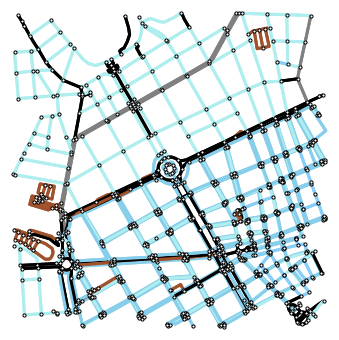

In [13]:
ec5 = ['skyblue'           if data['highway']=='footway'               
      else 'paleturquoise' if data['highway']=='residential' 
      else 'orange'        if data['highway']=='cycleway' 
      else 'sienna'        if data['highway']=='service' 
      else 'lightgreen'    if data['highway']=='living street' 
      else 'grey'          if data['highway']=='secondary'
      else 'lightskyblue'  if data['highway']=='pedestrian'
      else 'black'         for u, v, key, data in G.edges(keys=True, data=True)] #https://stackoverflow.com/questions/56234047/osmnx-plot-a-network-on-an-interactive-web-map-with-different-colours-per-infra

fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=10, 
                           node_zorder=6, edge_color=ec5, edge_linewidth=3)

# 7. Accessibility-Walkability

# 7.1 Find the north, south, east, west of bbox https://notebooks.azure.com/bradcavanagh/projects/osmnx-examples/html/notebooks/04-example-simplify-network.ipynb

In [133]:
dist = 500
point = (38.3459813, -0.49069405)
bbox = ox.bbox_from_point(point, distance=dist)
north, south, east, west = bbox
bbox

(38.35048314998173,
 38.34147944601904,
 -0.4849776469065278,
 -0.4964104877716314)

In [134]:
dir(bbox)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [135]:
north, south, east, west

(38.35048314998173,
 38.34147944601904,
 -0.4849776469065278,
 -0.4964104877716314)

In [136]:
bbox = [38.33247572606046, -0.5078434670348404, 38.359486837946314, -0.47354494506856737]  #lat-long bounding box 
distance = dist   #max distance in meters

##### first download the points of interest corresponding to the specified amenity type
#####1. 第一種方式
amenity = 'restaurant' #accessibility to this type of amenity
pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags= '"amenity" = "{}"'.format(amenity))
#pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags= '"amenity" ~ "{}"'.format(amenity))
#pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags= "amenity")

#####2.第二種方式
#osm_tags = '"amenity"~"{}"'.format('|'.join(amenity)) #https://www.gitmemory.com/issue/gboeing/urban-data-science/8/488323284
#pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags= osm_tags )

#####3. 第三種方式
#pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags= '"amenity" = "restaurant"') 
#pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags= "amenity = pub")

pois['amenity'].value_counts()
#pois[['amenity', 'name', 'lat', 'lon']].tail()
pois['lon']
pois

lat       lon     amenity                 name  \
id                                                                 
245422340   38.352649 -0.483398  restaurant          Valencia 11   
270744472   38.346877 -0.494505  restaurant  restaurante astorga   
319276779   38.340614 -0.479465  restaurant              Darsena   
375810956   38.348446 -0.481546  restaurant             La Ereta   
376624211   38.339048 -0.487114  restaurant            Aldebarán   
...               ...       ...         ...                  ...   
6984240986  38.345837 -0.482256  restaurant            San Telmo   
7001803494  38.350366 -0.486604  restaurant  Restaurante Teteria   
7004198986  38.344288 -0.482560  restaurant    Cerveceria Layton   
7005942786  38.346351 -0.483390  restaurant  La Tasca del Barrio   
7008504501  38.345675 -0.482144  restaurant            L’atelier   

                             website wheelchair        cuisine addr:postcode  \
id                                                                             
245422340                        NaN        NaN            NaN           NaN   
270744472                        NaN        NaN            NaN           NaN   
319276779       https://darsena.com/        yes            NaN           NaN   
375810956                        NaN        NaN  international           NaN   
376624211   https://www.maestral.es/        NaN       regional         03003   
...                              ...        ...            ...           ...   
6984240986                       NaN        NaN            NaN           NaN   
7001803494                       NaN        NaN           arab           NaN   
7004198986                       NaN        NaN  spanish;tapas           NaN   
7005942786                       NaN        NaN  spanish;tapas           NaN   
7008504501                       NaN        NaN  mediterranean           NaN   

                             addr:street                  email  ... takeaway  \
id                                                               ...            
245422340                            NaN                    NaN  ...      NaN   
270744472                            NaN                    NaN  ...      NaN   
319276779                            NaN                    NaN  ...      NaN   
375810956                            NaN                    NaN  ...      NaN   
376624211   paseo almirante Guillén Tato  aldebaran@maestral.es  ...      NaN   
...                                  ...                    ...  ...      ...   
6984240986                           NaN                    NaN  ...      NaN   
7001803494                           NaN                    NaN  ...      NaN   
7004198986                           NaN                    NaN  ...      NaN   
7005942786                           NaN                    NaN  ...      NaN   
7008504501                           NaN                    NaN  ...      NaN   

           name:en air_conditioning  bar brewery name:ru reservation capacity  \
id                                                                              
245422340      NaN              NaN  NaN     NaN     NaN         NaN      NaN   
270744472      NaN              NaN  NaN     NaN     NaN         NaN      NaN   
319276779      NaN              NaN  NaN     NaN     NaN         NaN      NaN   
375810956      NaN              NaN  NaN     NaN     NaN         NaN      NaN   
376624211      NaN              NaN  NaN     NaN     NaN         NaN      NaN   
...            ...              ...  ...     ...     ...         ...      ...   
6984240986     NaN              NaN  NaN     NaN     NaN         NaN      NaN   
7001803494     NaN              NaN  NaN     NaN     NaN         NaN      NaN   
7004198986     NaN              NaN  NaN     NaN     NaN         NaN      NaN   
7005942786     NaN              NaN  NaN     NaN     NaN         NaN      NaN   
7008504501     NaN              NaN  NaN     NaN     NaN         N

In [137]:
# query the OSM API for the street network within the specified bounding box

import os
os.environ['PROJ_LIB']=r"C:\Users\a\Anaconda\Library\share"
#####出現以下 error message: 
#####             _proj.pyx in _proj.Proj.__cinit__ (_proj.c:1170)()
#####             RuntimeError: b'no arguments in initialization list'
#####Solution1: 看ycebear的回答在 https://github.com/pyproj4/pyproj/issues/134
#####Solution2: https://stackoverflow.com/questions/55739427/osmnx-ox-graph-from-place-runtimeerror-bno-argument-in-initialization-list/55806843#55806843
#os.environ['PROJ_LIB']=r"C:\Users\a\Anaconda\envs\os\Library\share"

#####額外找到的
#conda install pyproj
#import pyproj
#from pyproj import Proj

#network = osm.network_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3])  ##這是原來的code但是已過期
#####Error message  : AttributeError: 'tuple' object has no attribute 'set_pois'
#####新版本在https://udst.github.io/pandana/loaders.html
#####要使用新版本，network才有node_ids這個attribute，才能計算len()以及接下來對network的query
network = osm.pdna_network_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3]) #####新版本的code

#network                  #####print network
#dir(network)            ##### Find all attributes of network
#hasattr('network', 'x') #####Check whether an attribute exist in network

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](38.33247573,-0.50784347,38.35948684,-0.47354495);>;);out;'}"
Downloaded 1,724.6KB from www.overpass-api.de in 2.69 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 3.16 seconds
Returning OSM data with 10,495 nodes and 2,693 ways...
Edge node pairs completed. Took 6.91 seconds
Returning processed graph with 4,014 nodes and 6,419 edges...
Completed OSM data download and Pandana node and edge table creation in 10.53 seconds


In [35]:
dir(network)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_imp_name_to_num',
 '_node_indexes',
 '_twoway',
 'aggregate',
 'aggregations',
 'bbox',
 'decays',
 'edges_df',
 'from_hdf5',
 'get_node_ids',
 'impedance_names',
 'init_pois',
 'kdtree',
 'low_connectivity_nodes',
 'max_dist',
 'max_pois',
 'nearest_pois',
 'net',
 'node_ids',
 'node_idx',
 'nodes_df',
 'num_categories',
 'plot',
 'poi_category_indexes',
 'poi_category_names',
 'precompute',
 'save_hdf5',
 'set',
 'set_pois',
 'shortest_path',
 'variable_names']

In [280]:
# how many network nodes did we get for this bounding box?
len(network.node_ids)

4014

In [138]:
# identify nodes that are connected to fewer than some threshold of other nodes within a given distance
# do nothing with this for now, but see full example in other notebook for more
lcn = network.low_connectivity_nodes(impedance=1000, count=10, imp_name='distance')

# precomputes the range queries (the reachable nodes within this maximum distance)
# so, as long as you use a smaller distance, cached results will be used
network.precompute(distance + 1)

# initialize the underlying C++ points-of-interest engine
network.init_pois(num_categories=1, max_dist=distance, max_pois=7)

In [139]:
# initialize a category for this amenity with the locations specified by the lon and lat columns
network.set_pois(category='my_amenity', x_col=pois['lon'], y_col=pois['lat'])

Reading parameters from init_pois()
Reading parameters from init_pois()


In [140]:
# search for the n nearest amenities to each node in the network
access = network.nearest_pois(distance=distance, category='my_amenity', num_pois=7)

# each df cell represents the network distance from the node to each of the n POIs
access.head()

1           2           3           4           5  \
id                                                                     
13843550  242.281998  500.000000  500.000000  500.000000  500.000000   
21323845  500.000000  500.000000  500.000000  500.000000  500.000000   
21323852  425.617004  500.000000  500.000000  500.000000  500.000000   
21323865   97.583000  228.294998  237.576004  378.500000  395.619995   
21323866  136.447998  177.727997  308.440002  358.003998  394.151001   

                   6           7  
id                                
13843550  500.000000  500.000000  
21323845  500.000000  500.000000  
21323852  500.000000  500.000000  
21323865  449.085999  472.914001  
21323866  395.368011  402.016998

In [141]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (bbox[2] - bbox[0]) / (bbox[3] - bbox[1])
fig_kwargs = {'facecolor':'w', 
              'figsize':(10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {'s':5, 
               'alpha':0.9, 
               'cmap':'viridis_r', 
               'edgecolor':'none'}

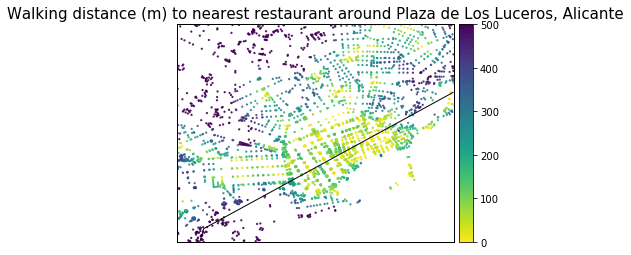

In [148]:
import os
os.environ['PROJLIB'] = r'C:/Users/a/Anaconda/pkgs/proj4-5.2.0-h6538335_1006/Library/share'

import numpy as np

import mpl_toolkits
mpl_toolkits.__path__.append('C:/Users/a/Anaconda/Lib/site-packages/mpl_toolkits/basemap')
#from mpl_toolkits.basemap import basemap ### Original code
from mpl_toolkits import basemap

# plot the distance to the nth nearest amenity
n = 1
bmap, fig, ax = network.plot(access[n], bbox=bbox, plot_kwargs=plot_kwargs, fig_kwargs=fig_kwargs)
#ax.set_axis_bgcolor('k')     ###orignal code. Too old. See : https://github.com/scikit-learn/scikit-learn/issues/10762
ax.set_facecolor('white')
ax.set_title('Walking distance (m) to nearest {} around Plaza de Los Luceros, Alicante'.format(amenity), fontsize=15)
#fig.savefig('images/accessibility-pub-east-bay.png', dpi=200, bbox_inches='tight')
plt.show()

# multiple value of amenities

In [333]:
pois2 = ox.pois_from_point((38.33247572606046, -0.5078434670348404), distance=500,  amenities=["bar","cafe","pub"])
pois2['amenity'].value_counts()
pois2['geometry'].x
#dir(pois2.geometry)

1242093866   -0.509004
5556335139   -0.508320
dtype: float64

In [334]:
network.set_pois(category='my_amenity', x_col=pois2['geometry'].x, y_col = pois2['geometry'].y )

Reading parameters from init_pois()
Reading parameters from init_pois()


In [311]:
# search for the n nearest amenities to each node in the network
access = network.nearest_pois(distance=distance, category='my_amenity', num_pois=7)

# each df cell represents the network distance from the node to each of the n POIs
access.head()

1           2           3            4            5  \
id                                                                       
13843550  242.281998  338.576996  764.643005   970.007019  1083.947021   
21323845  337.072998  485.153015  535.661987  1084.386963  1152.604980   
21323852  522.416016  590.633972  632.708008   636.356018   636.356018   
21323865  213.462997  522.130005  622.715027   700.051025   712.317017   
21323866  314.591003  521.877991  715.742981   793.078979   805.344971   

                    6            7  
id                                  
13843550  1083.947021  1119.420044  
21323845  1198.327026  1198.327026  
21323852   684.937012   687.318970  
21323865   901.221008   904.963989  
21323866   900.968994   945.440979

In [312]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (bbox[2] - bbox[0]) / (bbox[3] - bbox[1])
fig_kwargs = {'facecolor':'w', 
              'figsize':(10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {'s':5, 
               'alpha':0.9, 
               'cmap':'viridis_r', 
               'edgecolor':'none'}

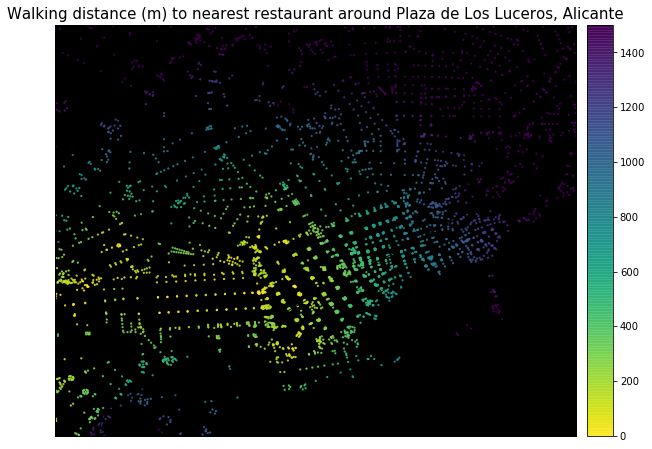

In [313]:
import os
os.environ['PROJLIB'] = r'C:/Users/a/Anaconda/pkgs/proj4-5.2.0-h6538335_1006/Library/share'

import numpy as np

import mpl_toolkits
mpl_toolkits.__path__.append('C:/Users/a/Anaconda/Lib/site-packages/mpl_toolkits/basemap')
#from mpl_toolkits.basemap import basemap ### Original code
from mpl_toolkits import basemap

# plot the distance to the nth nearest amenity
n = 1
bmap, fig, ax = network.plot(access[n], bbox=bbox, plot_kwargs=plot_kwargs, fig_kwargs=fig_kwargs)
#ax.set_axis_bgcolor('k')     ###orignal code. Too old. See : https://github.com/scikit-learn/scikit-learn/issues/10762
ax.set_facecolor('k')
ax.set_title('Walking distance (m) to nearest {} around Plaza de Los Luceros, Alicante'.format(amenity), fontsize=15)
#fig.savefig('images/accessibility-pub-east-bay.png', dpi=200, bbox_inches='tight')
plt.show()

# Alicante, Plaza del Ayuntamiento

Text(0.5, 1.0, 'bearning')

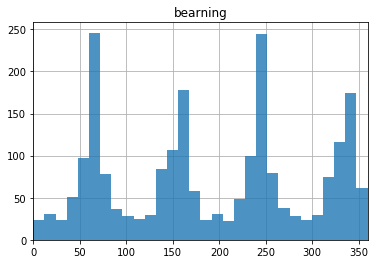

In [2]:
G = ox.graph_from_point((38.3450058, -0.48112878), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

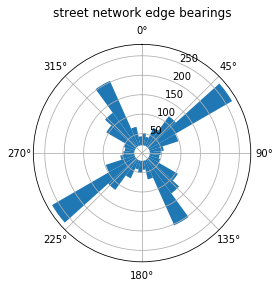

In [15]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Alcoy, Plaza de Dins

Text(0.5, 1.0, 'bearning')

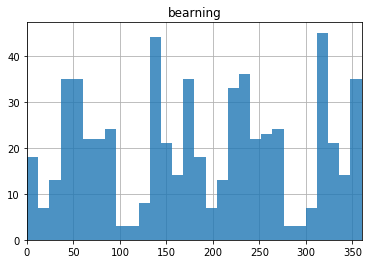

In [18]:
G = ox.graph_from_point((38.697963, -0.4737763), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

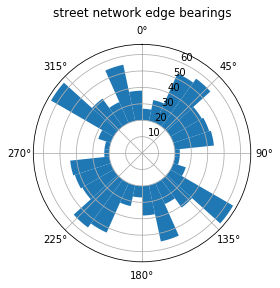

In [19]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Alcoy,Plaza España

Text(0.5, 1.0, 'bearning')

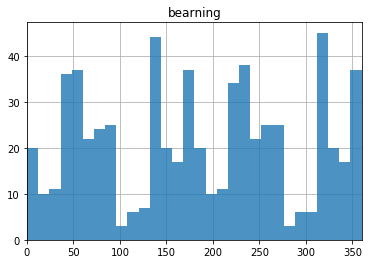

In [20]:
G = ox.graph_from_point((38.6977694, -0.47318459), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

In [2]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

NameError: name 'np' is not defined

# Alocy, Parque La Rosaleda

Text(0.5, 1.0, 'bearning')

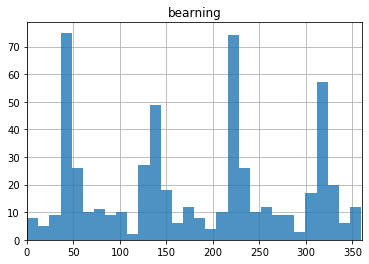

In [22]:
G = ox.graph_from_point((38.7024249, -0.477283), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

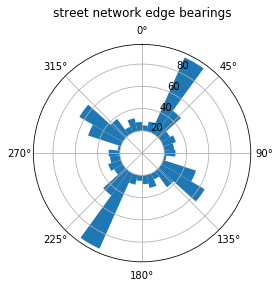

In [23]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Alcoy, Plaza Al-Azraq

Text(0.5, 1.0, 'bearning')

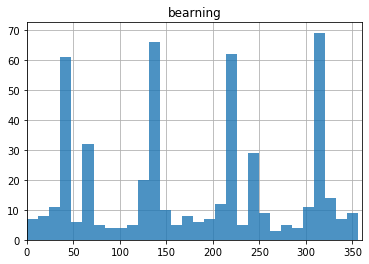

In [24]:
G = ox.graph_from_point((38.7084696, -0.46782617), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

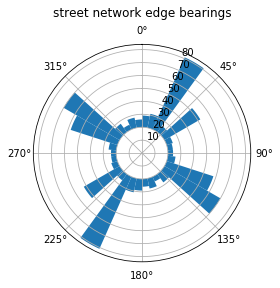

In [25]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Beniform, Plaza Triangular

Text(0.5, 1.0, 'bearning')

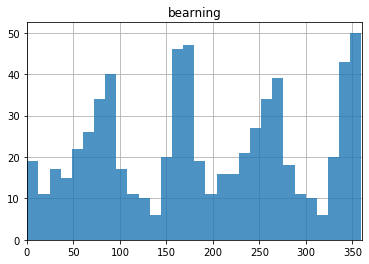

In [26]:
G = ox.graph_from_point((38.5372691, -0.12707233), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

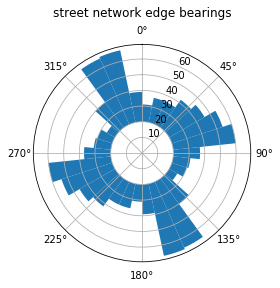

In [27]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Beniform, Santa Margarita

Text(0.5, 1.0, 'bearning')

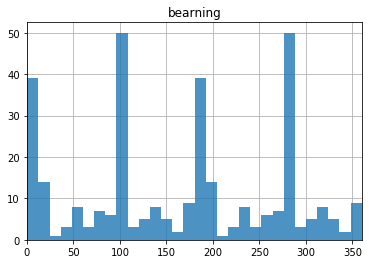

In [28]:
G = ox.graph_from_point((38.5363, -0.11506), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

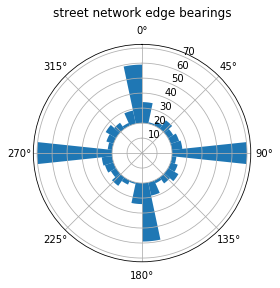

In [29]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Elda, Plaza Mayor

Text(0.5, 1.0, 'bearning')

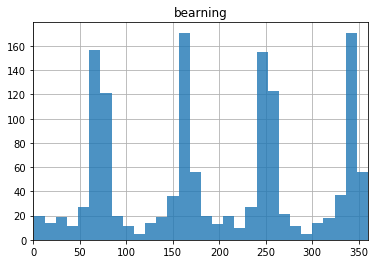

In [30]:
G = ox.graph_from_point((38.4783618, -0.79401514), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

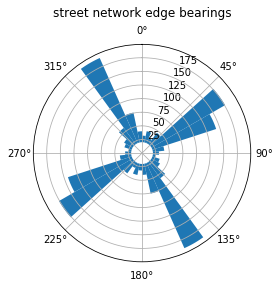

In [31]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Elda, Plaza Castelar

Text(0.5, 1.0, 'bearning')

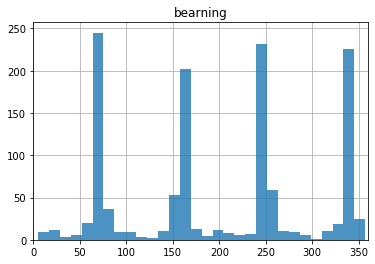

In [32]:
G = ox.graph_from_point((38.4787316, -0.79014034), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

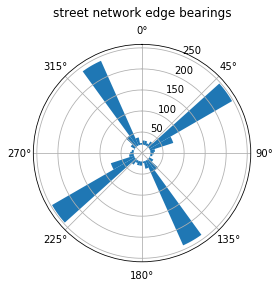

In [33]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Elda, Plaza Del Zapatero

Text(0.5, 1.0, 'bearning')

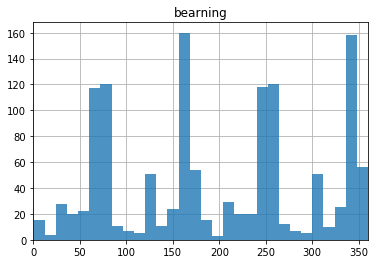

In [34]:
G = ox.graph_from_point((38.4761255, -0.79417776), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

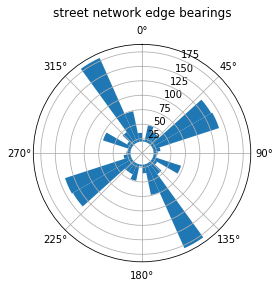

In [35]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Elche, Plaza Glorieta

Text(0.5, 1.0, 'bearning')

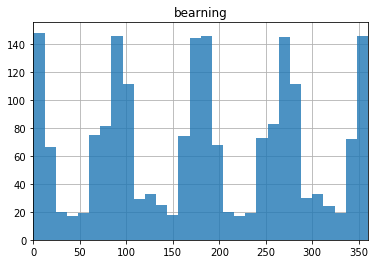

In [36]:
G = ox.graph_from_point((38.2657225, -0.69651604), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

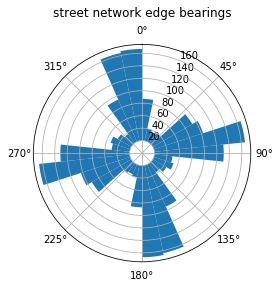

In [37]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Elche, Plaza de Baix

Text(0.5, 1.0, 'bearning')

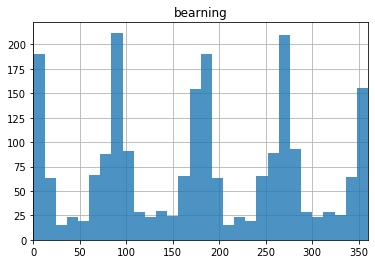

In [38]:
G = ox.graph_from_point((38.265272, -0.6987172), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

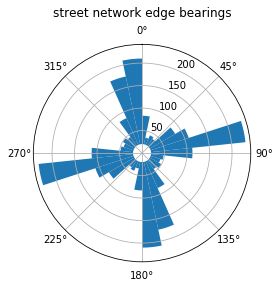

In [39]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Orihuela, Glorieta Gabriel Miró

Text(0.5, 1.0, 'bearning')

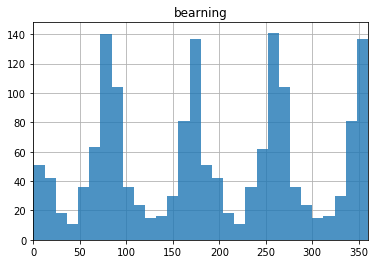

In [40]:
G = ox.graph_from_point((38.0822773, -0.94504759), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

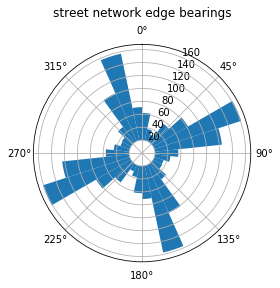

In [42]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Orihuela,Placeta de Europa

Text(0.5, 1.0, 'bearning')

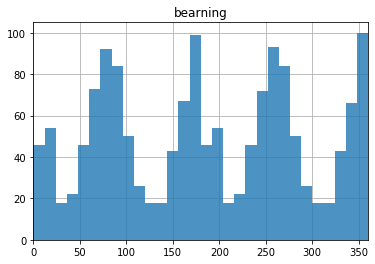

In [43]:
G = ox.graph_from_point((38.0846773, -0.94358794), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

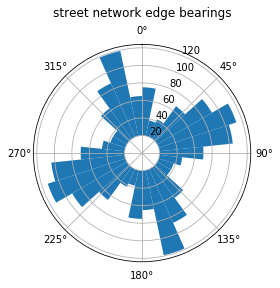

In [44]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# San Vicente, Sant Vicent del Raspeig

Text(0.5, 1.0, 'bearning')

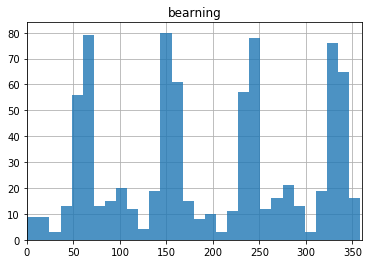

In [45]:
G = ox.graph_from_point((38.396366, -0.52496195), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

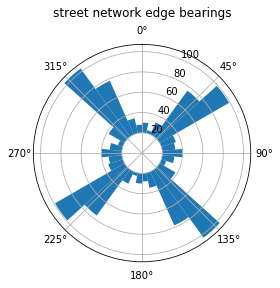

In [46]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# San Vicente,Parque Lo Torrent

Text(0.5, 1.0, 'bearning')

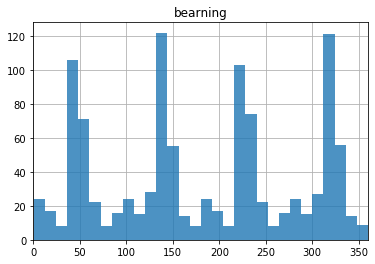

In [47]:
G = ox.graph_from_point((38.3937489, -0.51302068), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

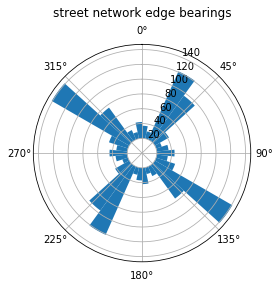

In [48]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Torrevieja, Plaza de la Constitución

Text(0.5, 1.0, 'bearning')

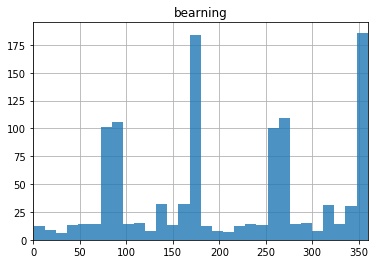

In [49]:
G = ox.graph_from_point((37.977618, -0.68269997), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

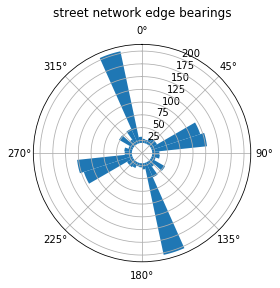

In [50]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)

# Torrevieja, Plaza Maria Asunción

Text(0.5, 1.0, 'bearning')

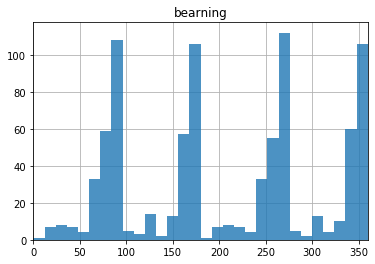

In [51]:
G = ox.graph_from_point((37.9807704, -0.6699553), distance=500, network_type='walk')
#fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

G = ox.add_edge_bearings(G)

bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('bearning')

Text(0.5, 1.1, 'street network edge bearings')

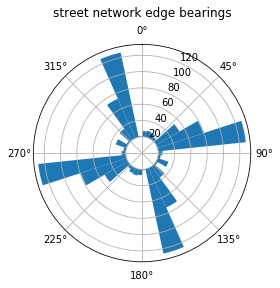

In [52]:
n = 30
bins = [ang * 360 / n for ang in range(0, n + 1)]
count, division = np.histogram(bearings, bins=bins, range=(bearings.min(), bearings.max()))
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=20.0)
ax.set_title('street network edge bearings', y=1.1)